In [1]:
using LinearAlgebra
using Plots  

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1278


In [2]:
using ForwardDiff

# Problem 1 

For convenience and notational clarity we write $g_j = g(x_j)$. Note that for every $(a,b)$, $f$ is locally a quadratic form because fixing $(a,b)$, $f(a,b) = f_{J^+}(a,b) = \frac{1}{12}\sum_{j \in J^+}(ax_j - b - g_j)^2$ where the active set $J^+ = \{j \mid ax_j - b > 0\}$. But now, the lines $ax_j = b$ tile the $(a-b)$-plane into finitely many regions $J^{+}_{i}$ so for every $(a_0, b_0)$, $\exists ! i,k$ such that $k = \pm$ where $(a_0, b_0) \in J^{k}_{i}$ and there exists $\varepsilon > 0$ such that $f(a,b) = f_{J^{k}_{i}}$ for $(a,b) \in B_{\varepsilon}((a,b))$. Consequently every critical point with active set $J^+$ will satisfy the following linear first order conditions: 

$$\begin{align} 0 = \frac{\partial f}{\partial a} &= \frac{1}{6}\sum_{j \in J^+}(ax_j - b - g_j)x_j \\
0 = \frac{\partial f}{\partial b} &= -\frac{1}{6}\sum_{j \in J^+}(ax_j - b - g_j) \end{align}$$

Note that when $ax_j - b \leq 0$ the equations are trivially satisfied since $J^+$ is empty. This is the flat region; here $f(a,b)$ is equal to $\sum_{j=0}^{5}(1 - cos(\pi j/10))^2$. I wrote some code to solve the equations in every region: 

In [19]:
ReLU(x) = max(x,0); 

function f(x)
    inds = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0];
    J = inds[x[1]*(π/10)*inds .- x[2] .> 0.0];
    val = 0.0; 
    #J = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0]; 
    
    for j in J
        val = val + (x[1]*π*j/10 - x[2] - 1 + cos(π*j/10))^2;
    end
    
    return (1/12)*val
end

function ∇f(x)
    inds = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0];
    J = inds[x[1]*(π/10)*inds .- x[2] .> 0.0];
    val = [0.0; 0.0]; 
    
    for j in J 
        val = val + [(x[1]*π*j/10 - x[2] - 1 + cos(π*j/10))*π*j/10; 
                     -(x[1]*π*j/10 - x[2] - 1 + cos(π*j/10))]
    end
    
    return (1/6).* val
end

T(J) =  [(π/10)*sum([j^2 for j in J]) -sum([j for j in J]); 
          (π/10)*sum([j for j in J]) -sum([1 for j in J])];
U(J) = [sum([j for j in J])-sum([j*cos(π*j/10) for j in J]); 
        sum([1 for j in J])-sum([cos(π*j/10) for j in J]);]

inds = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0]; 

In [4]:
g(x) = f(x); 

∇g(x) = ForwardDiff.gradient(f,x); 

∇²g(x) = ForwardDiff.hessian(f,x); 

In [14]:
J⁺ = [2.0, 3.0, 4.0, 5.0]; 
b⁺ = T(J⁺) \ U(J⁺)

2-element Array{Float64,1}:
 0.861289014650108
 0.373491544625422

In [8]:
inds[b⁺[1]*(π/10)*inds .- b⁺[2] .> 0.0] == J⁺

true

In [9]:
∇g(b⁺)

2-element Array{Float64,1}:
 -1.3877787807814457e-17
  8.211024452956886e-17

In [93]:
det(∇²g(b⁺))

0.054831135561607486

In [12]:
for j in 0:5
    jj = Float64(j); 
    J⁺ = Float64.(LinRange(j+1,5,5-j));
    J⁻ = Float64.(LinRange(0,j,j+1)); 
    b⁺ = T(J⁺) \ U(J⁺); 
    b⁻ = T(J⁻) \ U(J⁻);
    
    if min(b⁺[1],b⁺[2]) > 0 && inds[b⁺[1]*(π/10)*inds .- b⁺[2] .> 0.0] == J⁺
        print("\nValid Solution Found in J+",j,": ",b⁺, "\nGradient Norm: ", norm(∇g(b⁺))); 
    else
        print("\nInvalid Solution in J+",j,": ",b⁺);
    end
    
    if max(b⁻[1],b⁻[2]) > 0 && inds[b⁻[1]*(π/10)*inds .- b⁻[2] .> 0.0] == J⁻
        print("\nValid Solution Found in J-",j,": ",b⁻); 
    else
        print("\nInvalid Solution in J-",j,": ",b⁻);
    end
    
    print("\n-----------------------------------------------")
end



Invalid Solution in J+0: [0.7646163260044222, 0.2520090612445977]
Invalid Solution in J-0: [NaN, -0.0]
-----------------------------------------------
Valid Solution Found in J+1: [0.861289014650108, 0.373491544625422]
Gradient Norm: 8.327475758682409e-17
Invalid Solution in J-1: [0.15579194727527929, 1.1102230246251565e-16]
-----------------------------------------------
Invalid Solution in J+2: [0.935489283788638, 0.4745045868074186]
Invalid Solution in J-2: [0.3039588939177436, 0.015516006369226627]
-----------------------------------------------
Invalid Solution in J+3: [0.9836316430834764, 0.5450849718747519]
Invalid Solution in J-3: [0.43884867233420977, 0.043767255497061786]
-----------------------------------------------
Invalid Solution in J+4: [0.6366197723675814, -0.0]
Invalid Solution in J-4: [0.5555262784494233, 0.08042260651806157]
-----------------------------------------------
Invalid Solution in J+5: [NaN, NaN]
Invalid Solution in J-5: [0.6500206465729196, 0.120004314

So there is a solution $v$ in $J^{2}_{+}$; the quadratic form in $J^{+}_{2}$ is 

$$ \begin{align}f(a,b) &= \sum_{j=2}^{5}a^2j^2\pi^2/100 + b^2 + g^{2}_{j} - 2a\pi_j b/10 - 2ag_j + 2b_j g_j \\ 
&= a^2\sum_{j=2}^{5}j^2\pi^2/100 + 4b^2 - 2ab\sum_{j=2}^{5}\pi_j/10 -a2\sum_{j=2}^{5}j\pi g_j/10 + b2\sum{j=2}{5}g_j\\
&= [a \: b]^{\top}\begin{bmatrix}54\frac{\pi^2}{100} & -14\frac{\pi}{10} \\
                -14\frac{\pi}{10} & 4\end{bmatrix} - [2\sum_{j=2}^{5}j\pi -g_j/10 2\sum_{j=2}^{5}g_j][a \: b]^{\top} + \sum_{j=2}^{5}g^{2}_{j}
\end{align} $$
So the Hessian is $$\begin{bmatrix}54\frac{\pi^2}{100} & -14\frac{\pi}{10} \\ -14\frac{\pi}{10} & 4\end{bmatrix}$$ and fortunately its determinant is positive: 

In [15]:
det(∇²g(b⁺))

0.054831135561607486

So $v$ is indeed a minimum! The value at $v$ is 

In [16]:
f(b⁺)

0.00016364948126511687

In the flat region the value is 

In [21]:
sum([(1-cos(pi*j/10))^2 for j in 0:5])

1.6862484853249566

It is indeed a global minimum! Thus the flat region alongside the global minimum is characterised as

$$ ax_j \leq b \: \forall 0 \leq j \leq \bigsqcup \begin{bmatrix}54\frac{\pi^2}{100} & -14\frac{\pi}{10} \\
                -14\frac{\pi}{10} & 4\end{bmatrix}\begin{bmatrix}a\\ b\end{bmatrix} = \begin{bmatrix}\sum_{j=2}^{5}j\pi g_j/10 \\ \sum_{j=2}^{5}g_j \end{bmatrix}$$
                
# Problem 2 

The surefire way of ending up in the flat region is by ending up in it in the first step, i.e on the line $a \pi/2 = b$. Letting $\nabla f(0,1) = \begin{bmatrix}n_1 \\ n_2 \end{bmatrix}$ we compute $\alpha$ such that 

$$ \frac{1 + \alpha n_1}{\alpha n_2} = \frac{\pi}{2} $$

So $\alpha = \frac{\pi}{2n_2 - n_1}$. However, $0.99\alpha$ doesn't necessarily end up in the flat region: 

In [25]:
# Gradient descent 

init = [1;0];
α = π/(2*n[2]-π*n[1]);
step = 0.99*α; 
x = init; 
data = zeros(1000,2); 
data[1,:] = x;
p = scatter(x); 
for i=2:1000
    #iters = push!(iters, i); 
    x = x - step*∇g(x); 
    print("\nCurrent location:",x,"\nNext Direction: ", ∇g(x));
    data[i,:] = x; 
    if inds[x[1]*(π/10)*inds .- x[2] .<= 0.0] == inds
        print("\n IT'S A TRAP!!"); 
    end
    
    print("\n--------------------------------------------------")
end

        


Current location:[0.3857882269082423, 0.590286766480234]
Next Direction: [-0.2576870526320288, 0.16404867278867513]
--------------------------------------------------
Current location:[0.7709944589687893, 0.3450568627112749]
Next Direction: [-0.05936172848452333, 0.04723291170767195]
--------------------------------------------------
Current location:[0.8597319703205036, 0.27445024215225905]
Next Direction: [0.07121799955091856, -0.06488616187576221]
--------------------------------------------------
Current location:[0.7532709860308753, 0.3714460115311914]
Next Direction: [-0.09444911488614482, 0.07781766180911412]
--------------------------------------------------
Current location:[0.8944592502262781, 0.25511945190362795]
Next Direction: [0.11502778205439719, -0.09938640199814111]
--------------------------------------------------
Current location:[0.7225087464858788, 0.4036882722642993]
Next Direction: [-0.14540892855753154, 0.12186240164244325]
------------------------------------

Current location:[0.9213893276085307, 0.5780204660290233]
Next Direction: [-0.09654256175459626, 0.0922967838797211]
--------------------------------------------------
Current location:[1.0657070031266151, 0.44004963673639574]
Next Direction: [0.1327875913360107, -0.10547415045987696]
--------------------------------------------------
Current location:[0.8672080595418077, 0.5977187926503101]
Next Direction: [-0.13357682472364302, 0.10450946141583775]
--------------------------------------------------
Current location:[1.0668867970524682, 0.44149171241683394]
Next Direction: [0.13277846359024215, -0.10537760078996708]
--------------------------------------------------
Current location:[0.8684014981755295, 0.5990165400295286]
Next Direction: [-0.13341065951754577, 0.10440847549660484]
--------------------------------------------------
Current location:[1.0678318418600878, 0.4429404196717681]
Next Direction: [0.13255595536273046, -0.10510454997916152]
-------------------------------------

Current location:[1.1576289982099193, 0.4268084144039094]
Next Direction: [0.22414494970780954, -0.18168397372150705]
--------------------------------------------------
Current location:[0.8225635355471888, 0.6984006353875041]
Next Direction: [-0.2335557414307392, 0.18290136450533634]
--------------------------------------------------
Current location:[1.1716968203347384, 0.4249885848393493]
Next Direction: [0.2379748999764485, -0.19320944564705972]
--------------------------------------------------
Current location:[0.8159575093814051, 0.7138097801459246]
Next Direction: [-0.24867083136826434, 0.1947566255389161]
--------------------------------------------------
Current location:[1.1876857471656994, 0.4226757665181553]
Next Direction: [0.2538726787898298, -0.20647182004440656]
--------------------------------------------------
Current location:[0.8081814724228216, 0.7313223632859107]
Next Direction: [-0.266069845924979, 0.20839874522553492]
-------------------------------------------

Current location:[0.8876383318148285, 0.5746739199843462]
Next Direction: [-0.10229407876114374, 0.08015030642610346]
--------------------------------------------------
Current location:[1.0405537237183304, 0.45486038173496635]
Next Direction: [0.09958798566679497, -0.0771620036401861]
--------------------------------------------------
Current location:[0.8916835638660007, 0.5702068237734124]
Next Direction: [-0.09616024942867425, 0.0753750640618308]
--------------------------------------------------
Current location:[1.0354297357364066, 0.4575316073742345]
Next Direction: [0.0930784189127232, -0.0716251071804187]
--------------------------------------------------
Current location:[0.896290470999181, 0.5646011608348829]
Next Direction: [-0.08884907828435015, 0.06967762747149217]
--------------------------------------------------
Current location:[1.0291074609037532, 0.46044281813561183]
Next Direction: [0.08532853833029837, -0.06504983050024454]
----------------------------------------

Current location:[1.069953774742532, 0.4513285570040042]
Next Direction: [0.12829196698172254, -0.10106791646714688]
--------------------------------------------------
Current location:[0.8781751630509527, 0.6024110071576553]
Next Direction: [-0.1275049489602899, 0.09996473430641253]
--------------------------------------------------
Current location:[1.068777292480411, 0.45297766059330913]
Next Direction: [0.12603808360736685, -0.09910610753353344]
--------------------------------------------------
Current location:[0.8803679223291866, 0.6011274797916166]
Next Direction: [-0.12489501271294201, 0.09794521933547513]
--------------------------------------------------
Current location:[1.067068560793188, 0.4547130266664202]
Next Direction: [0.123248188315588, -0.09669663107116762]
--------------------------------------------------
Current location:[0.8828296952995034, 0.5992610143414656]
Next Direction: [-0.12169755077180706, 0.09546520903472891]
------------------------------------------

Current location:[0.8430953797387131, 0.6066186543052472]
Next Direction: [-0.15900065694782287, 0.12410983578885922]
--------------------------------------------------
Current location:[1.0807792033240728, 0.4210917459194067]
Next Direction: [0.1600725499298566, -0.12916124413441543]
--------------------------------------------------
Current location:[0.8414930491110623, 0.6141698058105948]
Next Direction: [-0.16506304948478012, 0.12889218556722296]
--------------------------------------------------
Current location:[1.088239304675758, 0.4214939509809851]
Next Direction: [0.1664042606429467, -0.13436164733371062]
--------------------------------------------------
Current location:[0.8394881253426467, 0.6223458889197314]
Next Direction: [-0.1718492177149911, 0.1342399578781637]
--------------------------------------------------
Current location:[1.09637875668171, 0.42167585975821675]
Next Direction: [0.17350089996534201, -0.14020690476165687]
-------------------------------------------

Current location:[1.0534495055641895, 0.422259670906882]
Next Direction: [0.13494041872282586, -0.10834891267773339]
--------------------------------------------------
Current location:[0.8517323850570978, 0.5842261957056499]
Next Direction: [-0.13782740811948108, 0.10748681599760992]
--------------------------------------------------
Current location:[1.0577651523773506, 0.42354838530067995]
Next Direction: [0.13782917714292706, -0.11065330409073504]
--------------------------------------------------
Current location:[0.8517297406135795, 0.5889596541187083]
Next Direction: [-0.140803702722404, 0.10985520675700511]
--------------------------------------------------
Current location:[1.0622116535846666, 0.424741429590657]
Next Direction: [0.14090429871133953, -0.11311739685373604]
--------------------------------------------------
Current location:[0.8515793636293172, 0.5938361736899938]
Next Direction: [-0.14399139044659298, 0.11238795118845335]
----------------------------------------

Current location:[1.0632478465679172, 0.43128799318377586]
Next Direction: [0.13702583029142096, -0.1095125902532292]
--------------------------------------------------
Current location:[0.8584133263916185, 0.5949940537861924]
Next Direction: [-0.13909819888774322, 0.10867298579476226]
--------------------------------------------------
Current location:[1.0663457488112629, 0.4325430848407445]
Next Direction: [0.1388575563199838, -0.1109467434320714]
--------------------------------------------------
Current location:[0.8587730534941376, 0.598393004579958]
Next Direction: [-0.14093795897361355, 0.11014643798713082]
--------------------------------------------------
Current location:[1.069455660850646, 0.43373942994925613]
Next Direction: [0.14074301369195089, -0.11242886461685216]
--------------------------------------------------
Current location:[0.859064469522379, 0.601804914309257]
Next Direction: [-0.14284204500542902, 0.111669290761088]
--------------------------------------------

Current location:[0.9847752159950423, 0.5895513029892984]
Next Direction: [-0.04869167884544673, 0.053519725550761406]
--------------------------------------------------
Current location:[1.057562490129224, 0.5095467718739429]
Next Direction: [0.07460904960501757, -0.05317248718825574]
--------------------------------------------------
Current location:[0.9460323585901469, 0.5890322300289712]
Next Direction: [-0.08272507932825575, 0.08157367469107904]
--------------------------------------------------
Current location:[1.0696948235043289, 0.4670909545860244]
Next Direction: [0.11650750891228598, -0.0903698302406987]
--------------------------------------------------
Current location:[0.8955323343281689, 0.6021812567312399]
Next Direction: [-0.1130848913409265, 0.08894402673888438]
--------------------------------------------------
Current location:[1.0645784872158686, 0.46922233211928727]
Next Direction: [0.11040046821532641, -0.08519844150252834]
--------------------------------------

Current location:[1.0555742920516846, 0.4689282142844825]
Next Direction: [0.10261796186892327, -0.07879410027056415]
--------------------------------------------------
Current location:[0.9021747400388506, 0.5867144133340982]
Next Direction: [-0.09790362730312603, 0.07703705844374552]
--------------------------------------------------
Current location:[1.0485270188720084, 0.4715547469517954]
Next Direction: [0.09443277100969666, -0.07187715744089622]
--------------------------------------------------
Current location:[0.9073631864941902, 0.5790010804257845]
Next Direction: [-0.08878987113903276, 0.06992039493606081]
--------------------------------------------------
Current location:[1.0400916699677025, 0.4744798341993932]
Next Direction: [0.08479574996743261, -0.06374366557457647]
--------------------------------------------------
Current location:[0.9133338410194776, 0.5697677308279189]
Next Direction: [-0.09764839281960792, 0.09269994049314545]
-------------------------------------

Current location:[0.8528716164756418, 0.6820863898722836]
Next Direction: [-0.19837780124884108, 0.15570111286987945]
--------------------------------------------------
Current location:[1.1494187831376896, 0.4493349248544194]
Next Direction: [0.2003393133682955, -0.16064789810492835]
--------------------------------------------------
Current location:[0.8499394292161014, 0.6894811444078442]
Next Direction: [-0.2054356899104426, 0.1612408377283641]
--------------------------------------------------
Current location:[1.1570371558301105, 0.4484485627502696]
Next Direction: [0.20775617994463563, -0.16682336503368567]
--------------------------------------------------
Current location:[0.846470620001686, 0.6978262447405676]
Next Direction: [-0.2135320523142878, 0.16759290500366822]
--------------------------------------------------
Current location:[1.1656712800891722, 0.4472982077393011]
Next Direction: [0.21626881938079193, -0.17391941202090316]
------------------------------------------

Current location:[1.066039843019296, 0.4534377801982593]
Next Direction: [0.1232692194284476, -0.09679270586969038]
--------------------------------------------------
Current location:[0.8817695389428114, 0.5981293863079794]
Next Direction: [-0.12185847156214202, 0.09556551090235388]
--------------------------------------------------
Current location:[1.0639309715629446, 0.4552722656508381]
Next Direction: [0.12005123592627065, -0.09402383205055534]
--------------------------------------------------
Current location:[0.8844711043595793, 0.5958247912750393]
Next Direction: [-0.11818850330321487, 0.09271576977258174]
--------------------------------------------------
Current location:[1.0611464458844728, 0.457227636463039]
Next Direction: [0.11614447923771096, -0.09067908757887044]
--------------------------------------------------
Current location:[0.8875266354794846, 0.5927802352302906]
Next Direction: [-0.11376247870676628, 0.08927364492638545]
----------------------------------------

Current location:[0.883761551500295, 0.6085746520473524]
Next Direction: [-0.1267830609257664, 0.09953652536875057]
--------------------------------------------------
Current location:[1.0732845589214566, 0.45978141816902063]
Next Direction: [0.12505431312012089, -0.09787426801548318]
--------------------------------------------------
Current location:[0.886345788549048, 0.6060898089587032]
Next Direction: [-0.1230963381880891, 0.09667037979892659]
--------------------------------------------------
Current location:[1.0703576592641657, 0.46158106327724446]
Next Direction: [0.1211352435983494, -0.09452897510240144]
--------------------------------------------------
Current location:[0.8892773516598523, 0.6028887073665207]
Next Direction: [-0.11867391272397126, 0.09322787357634779]
--------------------------------------------------
Current location:[1.0666783126214479, 0.46352602873538507]
Next Direction: [0.11644127682927152, -0.09053522950766076]
---------------------------------------

Current location:[1.1265016199105604, 0.528371310882489]
Next Direction: [0.1220461162812527, -0.09115781603793949]
--------------------------------------------------
Current location:[0.9440596845857845, 0.6646395419797881]
Next Direction: [-0.11241644355314358, 0.08968253594965776]
--------------------------------------------------
Current location:[1.1121066011865577, 0.5305766490173951]
Next Direction: [0.10764293638145257, -0.07913549076462542]
--------------------------------------------------
Current location:[0.9511954125648958, 0.6488731792789806]
Next Direction: [-0.09664124468390461, 0.07731584447981571]
--------------------------------------------------
Current location:[1.0956606053097067, 0.5332967666247607]
Next Direction: [0.0910405934374906, -0.06526653439992225]
--------------------------------------------------
Current location:[0.9595676056637749, 0.6308611399180708]
Next Direction: [-0.07843809375613486, 0.06304942073258611]
----------------------------------------

Current location:[1.0609406070993574, 0.4225939463034532]
Next Direction: [0.1413494608403708, -0.11361732664172774]
--------------------------------------------------
Current location:[0.8496428617995168, 0.5924360157649303]
Next Direction: [-0.14470435419152028, 0.11290461221035444]
--------------------------------------------------
Current location:[1.0659557051167448, 0.4236593550534866]
Next Direction: [0.1450232084483169, -0.11658331299567866]
--------------------------------------------------
Current location:[0.8491662191215763, 0.5979351607701566]
Next Direction: [-0.1485515917907381, 0.1159536681400486]
--------------------------------------------------
Current location:[1.0712301464932779, 0.42460058636447495]
Next Direction: [0.14901834834561395, -0.11982219292042458]
--------------------------------------------------
Current location:[0.8484684831198763, 0.6037180661938506]
Next Direction: [-0.15275896328926586, 0.11928352131131277]
----------------------------------------

Current location:[0.8552684143866295, 0.5814638705192868]
Next Direction: [-0.13318352046425963, 0.10388390065152145]
--------------------------------------------------
Current location:[1.054359216840938, 0.4261719164494495]
Next Direction: [0.1328806570943908, -0.10640760217760317]
--------------------------------------------------
Current location:[0.855721152917125, 0.5852364525942412]
Next Direction: [-0.1351815411745143, 0.10548572768071818]
--------------------------------------------------
Current location:[1.0577987178863324, 0.4275499903485867]
Next Direction: [0.13492566248457574, -0.10801017219529777]
--------------------------------------------------
Current location:[0.8561036558989749, 0.5890101453334559]
Next Direction: [-0.13723802615904085, 0.10713224033877444]
--------------------------------------------------
Current location:[1.0612553793254553, 0.42886237612429035]
Next Direction: [0.13703406275093405, -0.10966911352088426]
----------------------------------------

Current location:[1.0559518944651567, 0.5047917907373426]
Next Direction: [0.07666399804168034, -0.05516184632789049]
--------------------------------------------------
Current location:[0.9413499013937273, 0.5872510635662815]
Next Direction: [-0.08557867613148687, 0.08381865077939073]
--------------------------------------------------
Current location:[1.0692780958475394, 0.4619538617342838]
Next Direction: [0.11990303031011913, -0.09348908148133168]
--------------------------------------------------
Current location:[0.8900397753861808, 0.6017070097810752]
Next Direction: [-0.11730436185292549, 0.09215797982811369]
--------------------------------------------------
Current location:[1.065393448658068, 0.46394367320167584]
Next Direction: [0.11499382853311235, -0.08931494538621634]
--------------------------------------------------
Current location:[0.8934937007001799, 0.5974570694996537]
Next Direction: [-0.11179330591299054, 0.0878628444089016]
--------------------------------------

In [23]:
n = -∇g([1;0])

2-element Array{Float64,1}:
 -0.4108822971353948
  0.3948774562870352

In [102]:
π/(2*n[2]-π*n[1])

1.5099602410260964

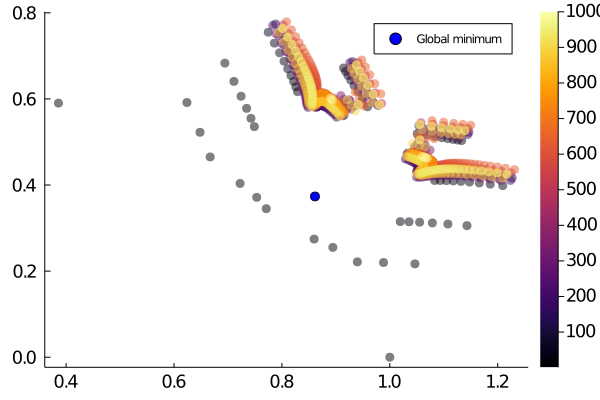

In [38]:
plot(data[:,1],data[:,2], 
    markershape = :circle, 
    marker_z = LinRange(1,1000,1000),
    markerstrokewidth = 0.0, 
    xtickfontsize = 12,
    ytickfontsize = 12, 
    markersize = 5.0,
    markeralpha = 0.5,
    label = false,
    gridalpha = 0.0,
    linealpha=0.0)
plot!([b⁺[1]],[b⁺[2]], label = "Global minimum", 
      markershape = :circle, linealpha = 0.0, markersize = 5.0, markercolor = :blue)

This is because when $\alpha = 0.99\alpha^{*}$ the stepsize is too large so the iterates never end up completely inside the critical oval of the global minimum. Similarly, the maximal $\alpha^{*}$ for which the iterates necessarily converge to the global minimum is the minimal distance to the line $a\pi/5 = b$ which always intersects with the oval. Calculating $\alpha^{*}$ is the same process but now $\alpha^{*} = \frac{\pi}{5n_2 - n_1}$. 

In [40]:
# Gradient descent 

init = [1;0];
α = π/(5*n[2]-π*n[1]);
step = 0.99*α; 
x = init; 
data = zeros(1000,2); 
data[1,:] = x;
p = scatter(x); 
for i=2:1000
    #iters = push!(iters, i); 
    x = x - step*∇g(x); 
    #print("\nCurrent location:",x,"\nNext Direction: ", ∇g(x));
    data[i,:] = x; 
    if inds[x[1]*(π/10)*inds .- x[2] .<= 0.0] == inds
        print("\n IT'S A TRAP!!"); 
    end
    
    #print("\n--------------------------------------------------")
end



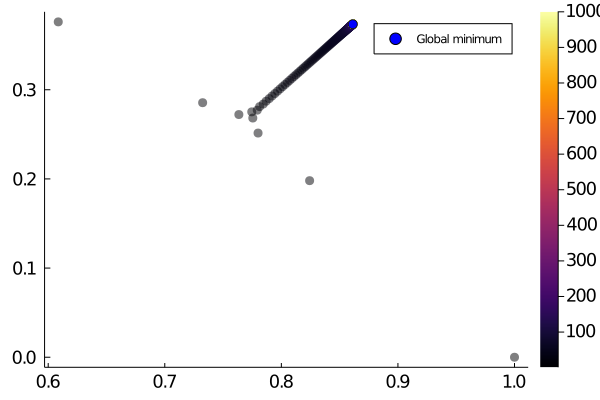

In [41]:
plot(data[:,1],data[:,2], 
    markershape = :circle, 
    marker_z = LinRange(1,1000,1000),
    markerstrokewidth = 0.0, 
    xtickfontsize = 12,
    ytickfontsize = 12, 
    markersize = 5.0,
    markeralpha = 0.5,
    label = false,
    gridalpha = 0.0,
    linealpha=0.0)
plot!([b⁺[1]],[b⁺[2]], label = "Global minimum", 
      markershape = :circle, linealpha = 0.0, markersize = 5.0, markercolor = :blue)

# Problem 3 

The strategy that works for Stochastic Gradient Descent is simple annealing: roughly, this is because the initial stepsizes are large enough to escape $J^{+}_{i}$ for $i \neq 2$. However, $f$ is strictly convex in the critical oval so once the iterates end up in the critical oval, they will necessarily converge (in expected value) to the global minimum if the step size is constant in the critical oval. We do this approximately: by setting a small number of long schedules we ensure that once the iterates are in the critical oval, the step size is constant. 

In [50]:
# prepping for SGD 

∇ff(x,i) = (x[1]*π*i/10 - x[2] <=0) ? [0.0;0.0] : [(x[1]*π*i/10 - x[2] - 1 + cos(π*i/10))*π*i/10;
                                                 -(x[1]*π*i/10 - x[2] - 1 + cos(π*i/10))] 



∇ff (generic function with 1 method)

In [56]:
init = [1;0];
α = π/(5*n[2]-π*n[1]);
step = 0.99*α; 
x = init; 
dats = Array{Float64,2}(undef,1,2)
dats[1,:] = x;  
N = 36;
NN = 6;
broken = false;
for ii in 1 : NN
    ss = step/(2^ii);
    nsteps = Int64(ceil(N*(2^ii)/ii));
    for i in 1 : nsteps
        k = Float64(rand(0:5)); 
        x = x - ss*∇ff(x,k);
        #print("\nCurrent location:",x,"\nFrom Direction: ", ∇ff(x,k), "\nStepsize = ",ss);
        dats = [dats; reshape(x,1,2)]; 
        if inds[x[1]*(π/10)*inds .- x[2] .<= 0.0] == inds
            #print("\n IT'S A TRAP!! I DIES X----("); #broken = true; break;  
        end
    
        #print("\n--------------------------------------------------")
    end
    #if broken
    #    break;
    # end
end


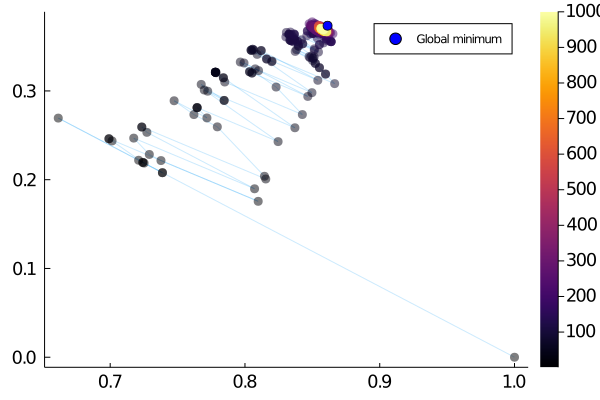

In [57]:
plot(dats[:,1],dats[:,2], 
    markershape = :circle, 
    marker_z = LinRange(1,size(dats)[1],size(dats)[1]),
    markerstrokewidth = 0.0, 
    xtickfontsize = 12,
    ytickfontsize = 12, 
    markersize = 5.0,
    markeralpha = 0.5,
    label = false,
    gridalpha = 0.0,
    linealpha=0.2)
plot!([b⁺[1]],[b⁺[2]], label = "Global minimum", 
      markershape = :circle, linealpha = 0.0, markersize = 5.0, markercolor = :blue)